In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [4]:
#importing the dataset 
data=pd.read_csv('/content/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#finding the sum of null values in each column
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0]) 
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].str.replace('+','')
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

<ipython-input-7-d5652316fc76>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#  Loan_ID  Dependents Property_Area  Loan_Status
data=data.replace(['Male'],[0])
data=data.replace(['Female'],[1])
data=data.replace(['No'],[0])
data=data.replace(['Yes'],[1])
data=data.replace(['Graduate'],[1])
data=data.replace(['Not Graduate'],[0])
data=data.replace(['Urban'],[0])
data=data.replace(['Semiurban'],[1])
data=data.replace(['Rural'],[2])
data=data.replace(['Y'],[1])
data=data.replace(['N'],[0])
print(data['Gender'].value_counts(),'\n',
data['Married'].value_counts(),'\n',
data['Self_Employed'].value_counts(),'\n',
data['Education'].value_counts(),'\n',
data['Property_Area'].value_counts(),'\n',
data['Loan_Status'].value_counts())

0    502
1    112
Name: Gender, dtype: int64 
 1    401
0    213
Name: Married, dtype: int64 
 0    532
1     82
Name: Self_Employed, dtype: int64 
 1    480
0    134
Name: Education, dtype: int64 
 1    233
0    202
2    179
Name: Property_Area, dtype: int64 
 1    422
0    192
Name: Loan_Status, dtype: int64


In [10]:
data.drop('Loan_ID',axis=1,inplace=True)

In [11]:
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed']=data['Self_Employed'].astype('int64')
data['Property_Area']=data['Property_Area'].astype('int64')

In [12]:
data['ApplicantIncome']=data['ApplicantIncome'].astype('int64')
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

In [13]:
from imblearn.combine import SMOTETomek
smote=SMOTETomek(sampling_strategy=0.90)

In [14]:
#dividing the dataset into dependent and independent y and x respectively
x=data.drop(columns=['Loan_Status'],axis=1)
y=data['Loan_Status']

In [15]:
x_bal,y_bal=smote.fit_resample(x,y)

In [16]:
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    353
0    310
Name: Loan_Status, dtype: int64


Descriptive statistical

In [17]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.24430,145.465798,342.410423,0.855049,0.962541,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.24876,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.00000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.50000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.25000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000,2.000000,1.000000


## Univariate Analysis

<ipython-input-18-b806fb277601>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'],color='r')


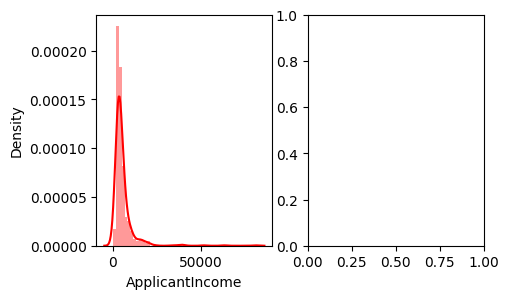

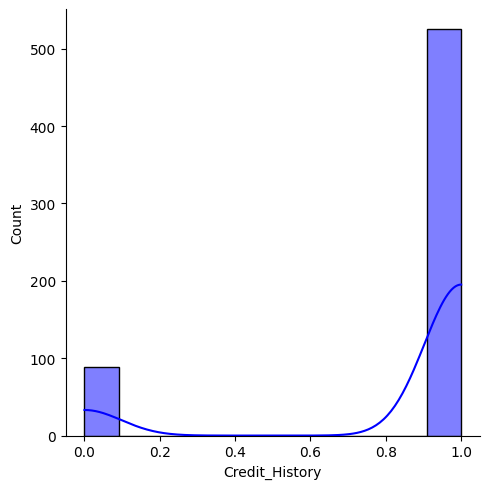

In [18]:
plt.figure(figsize=(5,3))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],color='r')
plt.subplot(122)
sns.displot(data['Credit_History'],color='b',kde=True)
plt.show()

## Bivariate Analysis

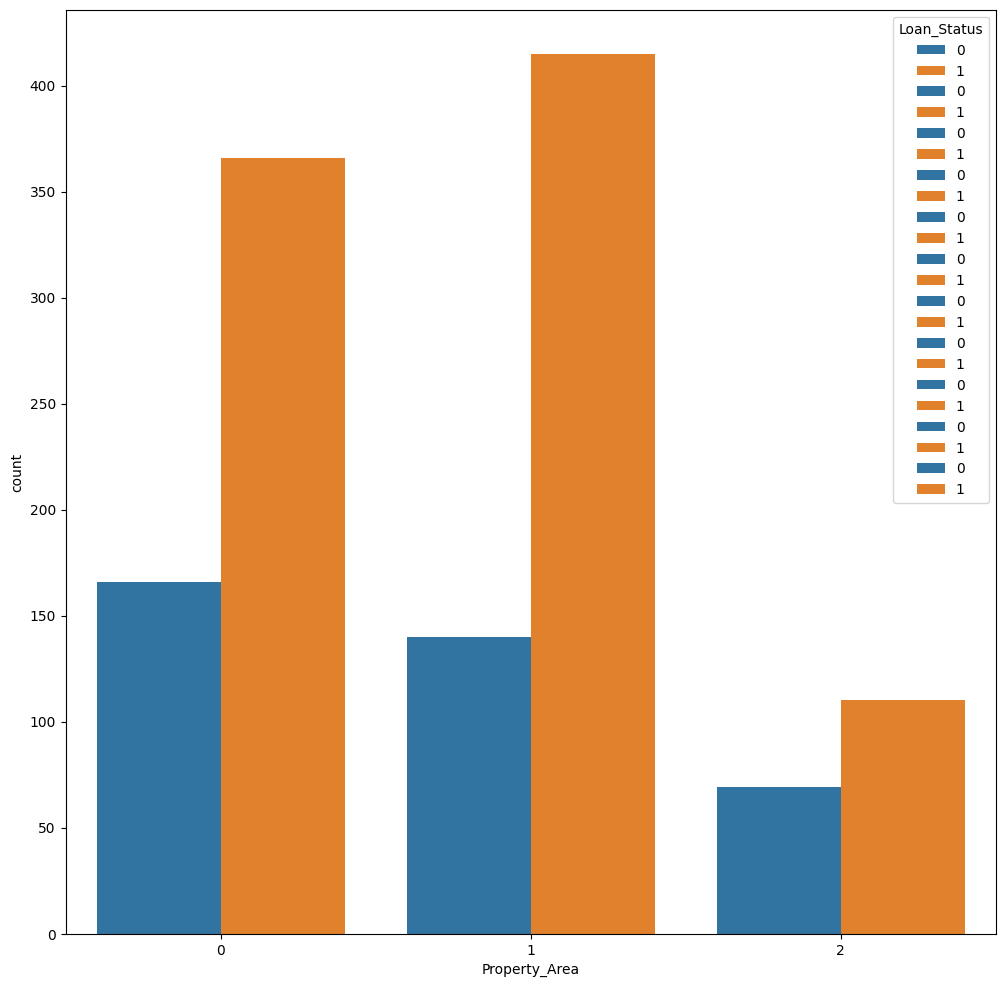

In [19]:
da=data.drop(['Loan_Status'],axis=1)
plt.figure(figsize=(12,12))
for i,j in enumerate(da):
   plt.subplot(1,1,1)
   sns.countplot(x=data[j],hue='Loan_Status',data=data)

 Multivariate analysis

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


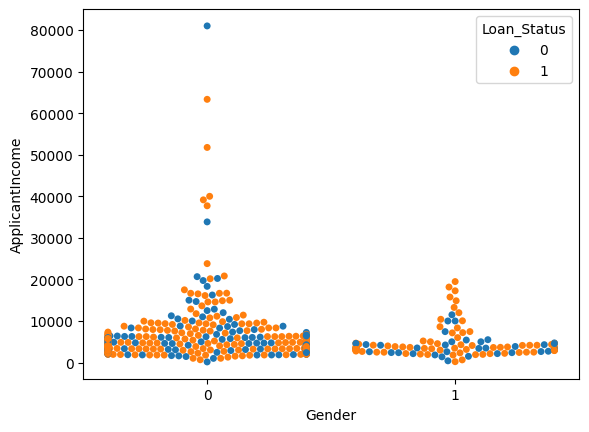

In [20]:
sns.swarmplot(x=data['Gender'],y=data['ApplicantIncome'],hue=data['Loan_Status'])

 Spliting data into train and test

In [21]:
x=data.drop(columns=['Loan_Status'],axis=1)
y=data['Loan_Status']
x_train,x_test,y_train,y_test=train_test_split(x_bal,y_bal,test_size=0.33,random_state=42)

# **Model Building**

Decision Tree Model

In [34]:
def decisionTree(x_train,x_test,y_train,y_test):
 dt=DecisionTreeClassifier()
 x=data.drop(columns=['Loan_Status'],axis=1)
 y=data['Loan_Status']
 x_train,x_test,y_train,y_test=train_test_split(x_bal,y_bal,test_size=0.33,random_state=42)
 dt.fit(x_train,y_train)
 yPred=data.predict(x_test)
 print('***DecisionTreeClassifier***')
 print('confusion matrix')
 print(confusion_matrix(y_test,yPred))
 print('classification_report')
 print(classification_report(y_test,yPred))

Random Forest Model



In [24]:
def Randomforest(x_train,x_test,y_train,y_test):
 rf=RandomForestClassifier()
 rf.fit(x_train,y_train)
 yPred=rf.predict(x_test)
 print('***RandomForestClassifier***')
 print('confusion matrix')
 print(confusion_matrix(y_test,yPred))
 print('classification_report')
 print(classification_report(y_test,yPred))

KNN

In [25]:
def KNN(x_train,x_test,y_train,y_test):
 KNN=KNeighborsClassifier()
 KNN.fit(x_train,y_train)
 yPred=KNN.predict(x_test)
 print('***KNeighborsClassifier***')
 print('confusion matrix')
 print(confusion_matrix(y_test,yPred))
 print('classification_report')
 print(classification_report(y_test,yPred))

Xgboost model

In [36]:
def Xgboost(x_train,x_test,y_train,y_test):
 xg=GradientBoostingClassifier()
 xg.fit(x_train,y_train)
 yPred=xg.predict(x_test)
 print('***GradientBoostingClassifier***')
 print('confusion matrix')
 print(confusion_matrix(y_test,yPred))
 print('classification_report')
 print(classification_report(y_test,yPred))

ANN model

In [37]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [38]:
classifier=Sequential()

In [39]:
classifier.add(Dense(units=100,activation='relu',input_dim=11))

In [30]:
classifier.add(Dense(units=50,activation='relu'))

In [40]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [41]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [42]:
#fitting the ANN to the training set
model_history = classifier.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 100ms/step - loss: 392.9319 - accuracy: 0.4986 - val_loss: 347.4001 - val_accuracy: 0.3933
Epoch 2/100
4/4 [==============================] - 0s 21ms/step - loss: 231.3026 - accuracy: 0.5127 - val_loss: 230.9839 - val_accuracy: 0.4831
Epoch 3/100
4/4 [==============================] - 0s 17ms/step - loss: 127.6714 - accuracy: 0.5296 - val_loss: 167.0192 - val_accuracy: 0.5056
Epoch 4/100
4/4 [==============================] - 0s 17ms/step - loss: 113.5818 - accuracy: 0.4845 - val_loss: 158.0589 - val_accuracy: 0.6180
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 100.8115 - accuracy: 0.4901 - val_loss: 83.0871 - val_accuracy: 0.6067
Epoch 6/100
4/4 [==============================] - 0s 19ms/step - loss: 46.3629 - accuracy: 0.4845 - val_loss: 65.4022 - val_accuracy: 0.4157
Epoch 7/100
4/4 [==============================] - 0s 23ms/step - loss: 45.8439 - accuracy: 0.4930 - val_loss: 28.4579 - val_accuracy: 0.3

# **Testing the model**

In [53]:
def decisionTree(x_train,x_test,y_train,y_test):
 dt=DecisionTreeClassifier()
 dt.fit(x_train,y_train)
 dt.predict([[1,1,0,1,1,4276,1542,145,220,0,1]])

In [54]:
def randomForest(x_train,x_test,y_train,y_test):
 rf=RandomForestClassifier()
 rf.fit(x_train,y_train)
 rf.predict([[1,1,0,1,1,4276,1542,145,220,0,1]])

In [55]:
def KNN(x_train,x_test,y_train,y_test):
 KNN=KNeighborsClassifier()
 KNN.fit(x_train,y_train)
 KNN.predict([[1,1,0,1,1,4276,1542,145,220,0,1]])

In [56]:
def Xgboost(x_train,x_test,y_train,y_test):
 xg=GradientBoostingClassifier()
 xg.fit(x_train,y_train)
 xg.predict([[1,1,0,1,1,4276,1542,145,220,0,1]])

In [57]:
classifier.save("loan.h5")

In [58]:
y_pred=classifier.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [59]:
y_pred

array([[5.2364986e-02],
       [9.6122807e-01],
       [9.2595192e-03],
       [1.0000000e+00],
       [2.9427949e-01],
       [9.6403968e-01],
       [9.8214656e-01],
       [3.6129275e-01],
       [9.1411400e-01],
       [5.5960272e-03],
       [2.8220188e-06],
       [9.6507615e-01],
       [1.5920632e-02],
       [6.9605798e-01],
       [1.0886265e-01],
       [7.0728756e-02],
       [4.1240601e-06],
       [8.0638933e-01],
       [1.1495072e-01],
       [9.9934256e-01],
       [9.9261624e-01],
       [8.7001055e-01],
       [9.9793333e-01],
       [1.9002799e-02],
       [1.9214264e-03],
       [9.0626931e-01],
       [6.9011815e-02],
       [9.0884107e-01],
       [1.7541961e-03],
       [9.4812590e-01],
       [7.7569067e-01],
       [4.1047880e-01],
       [7.4332923e-01],
       [4.2640296e-04],
       [9.4950366e-01],
       [8.7952298e-01],
       [5.6656546e-08],
       [7.2578802e-03],
       [9.4296706e-01],
       [8.8256158e-02],
       [2.4117167e-05],
       [9.282487

In [60]:
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [

In [65]:
def predict_exit(sample_value):
  sample_value=np.array(sample_value)
  sample_value=sample_value.reshape(1,-1)
  return classifier.predict(sample_value)



In [66]:
sample_value=[[1,1,0,1,1,4276,1542,145,240,0,1]]
if predict_exit(sample_value).all()>0.5:
  print('prediction:high chance of loan approval!')
else:
  print('prediction:low chance loan approval.')


1/1 [==============================] - 0s 138ms/step
prediction:high chance of loan approval!


# **Performance testing & hyperparameter tuning**

compare the model

In [67]:
def compareModel(x_train,x_test,y_train,y_test):
  x=data.drop(columns=['Loan_Status'],axis=1)
  y=data['Loan_Status']
  x_train,x_test,y_train,y_test=train_test_split(x_bal,y_bal,test_size=0.33,random_state=42)
  decisionTree(x_train,x_test,y_train,y_test)
  print('-'*100)
  randomForest(x_train,x_test,y_train,y_test)
  print('-'*100)
  Xgboost(x_train,x_test,y_train,y_test)
  print('-'*100)
  KNN(x_train,x_test,y_train,y_test)
  print('-'*100)


In [68]:
compareModel(x_train, x_test, y_train, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [69]:
ypred=classifier.predict(x_test)
print(accuracy_score(y_pred,y_test))
print("ANN MODEL")
print("Confusion_Matrix")
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))


7/7 [==============================] - 0s 2ms/step
0.589041095890411
ANN MODEL
Confusion_Matrix
[[53 42]
 [48 76]]
Classification Report
              precision    recall  f1-score   support

           0       0.52      0.56      0.54        95
           1       0.64      0.61      0.63       124

    accuracy                           0.59       219
   macro avg       0.58      0.59      0.58       219
weighted avg       0.59      0.59      0.59       219



In [70]:
from sklearn.model_selection import cross_val_score


In [71]:
#random forest model is selected
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
yPred=rf.predict(x_test)
print('-'*100)

----------------------------------------------------------------------------------------------------


In [72]:
f1_score(yPred,y_test,average='weighted')

0.8373639904808138

In [73]:
cv=cross_val_score(rf,x,y,cv=5)

In [74]:
np.mean(cv)

0.7785019325603093

In [76]:
model=decisionTree,randomForest,KNN,Xgboost,(x_train,x_test,y_train,y_test)

In [77]:
pickle.dump(model,open('rdf.pkl','wb'))

In [78]:
pickle.dump(model,open('scale1.pkl','wb'))